In [1]:
pwd

'/home/justinchiu/research/onecommon/webapp/experiments'

In [2]:
import pandas

In [3]:
import json

In [4]:
by_batch = {
    #0: 'Batch_4256735_batch_results.csv',
    #1: 'Batch_4258211_batch_results.csv',
    #2: 'Batch_4258382_batch_results.csv',
    0: "Batch_4767158_batch_results.csv",
}

In [5]:
BATCH = 0

In [6]:
batch_results = pandas.read_csv(by_batch[BATCH]).sort_values('SubmitTime')

In [7]:
batch_results['SubmitTime']

17    Thu Jun 23 08:58:22 PDT 2022
13    Thu Jun 23 09:03:10 PDT 2022
10    Thu Jun 23 09:03:25 PDT 2022
22    Thu Jun 23 09:05:17 PDT 2022
24    Thu Jun 23 09:11:18 PDT 2022
2     Thu Jun 23 09:13:33 PDT 2022
16    Thu Jun 23 09:24:56 PDT 2022
21    Thu Jun 23 09:35:42 PDT 2022
9     Thu Jun 23 09:39:03 PDT 2022
7     Thu Jun 23 09:39:21 PDT 2022
25    Thu Jun 23 09:44:55 PDT 2022
14    Thu Jun 23 09:46:25 PDT 2022
29    Thu Jun 23 09:48:31 PDT 2022
15    Thu Jun 23 09:50:14 PDT 2022
3     Thu Jun 23 09:55:14 PDT 2022
27    Thu Jun 23 10:01:44 PDT 2022
28    Thu Jun 23 10:05:23 PDT 2022
26    Thu Jun 23 10:05:29 PDT 2022
1     Thu Jun 23 10:12:04 PDT 2022
11    Thu Jun 23 10:15:18 PDT 2022
20    Thu Jun 23 10:16:02 PDT 2022
6     Thu Jun 23 10:17:46 PDT 2022
8     Thu Jun 23 10:19:05 PDT 2022
23    Thu Jun 23 10:56:02 PDT 2022
5     Thu Jun 23 10:56:23 PDT 2022
4     Thu Jun 23 10:58:05 PDT 2022
12    Thu Jun 23 11:02:57 PDT 2022
0     Thu Jun 23 11:28:02 PDT 2022
19    Thu Jun 23 12:

In [8]:
len(batch_results)

30

In [9]:
from collections import Counter

In [10]:
import boto3

In [11]:
import os

In [12]:
MTURK_ACCESS_KEY = os.environ["MTURK_ACCESS_KEY"]
MTURK_SECRET = os.environ["MTURK_SECRET"]
MTURK_SANDBOX_URL = "https://mturk-requester-sandbox.us-east-1.amazonaws.com"

In [13]:
from collections import Counter, defaultdict

In [14]:
import pprint

In [15]:
def mturk_client(live_hit=True):
    if live_hit:
        mturk = boto3.client('mturk',
           aws_access_key_id = MTURK_ACCESS_KEY,
           aws_secret_access_key = MTURK_SECRET,
           region_name='us-east-1'
           )
    else:
        mturk = boto3.client('mturk',
          aws_access_key_id = MTURK_ACCESS_KEY,
          aws_secret_access_key = MTURK_SECRET,
          region_name='us-east-1',
          endpoint_url=MTURK_SANDBOX_URL
        )
    return mturk

In [16]:
mturk = mturk_client(True)

In [17]:
def bonus(live_hit, worker_id, assignment_id, bonus_amount, reason):
    mturk = mturk_client(live_hit)
    response = mturk.send_bonus(WorkerId=worker_id, AssignmentId=assignment_id, BonusAmount=bonus_amount, Reason=reason)
    if ("ResponseMetadata" not in response or 
            "HTTPStatusCode" not in response["ResponseMetadata"] or
            response["ResponseMetadata"]["HTTPStatusCode"] != 200
           ):
        print("ERROR: Bonus payment to worker {} failed!", worker_id)
        print(response)
        print()

In [18]:
# bonus(False, 'A1XO1B7X9DYMPL', '3WJEQKOXA82MU97BGMKDF2AHNYX1A1', '0.40', 'test API bonus')

<AxesSubplot:>

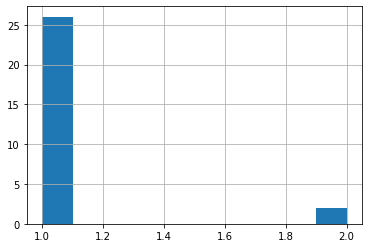

In [19]:
batch_results.reset_index()['WorkerId'].value_counts().hist()

In [20]:
len(set(batch_results['Answer.surveycode']))

30

In [21]:
len(batch_results)

30

In [22]:
assert len(set(batch_results['Answer.surveycode'])) == len(batch_results)

In [23]:
batch_results.groupby('Answer.surveycode')['WorkerId'].count()

Answer.surveycode
TASK_DONE_a41d1651b9a534b009514a65cf700263b    1
TASK_DONE_a7ea00e5521914c5b94ecc28fba4e1adb    1
TASK_DONE_ac83dba13625c49abb4e97b05572fd08e    1
TASK_DONE_adde8e838f96647889e4e0e49d087dadd    1
TASK_DONE_aed4a9210af8f4ee4bd580fd85b33d6a3    1
TASK_DONE_c1fac41cb2d0f419d837f8b20773b5ed0    1
TASK_DONE_c30c4f8d01e5d4981ae764a0529344b88    1
TASK_DONE_c4706c29e8879448898fdbc3c70f3bd9e    1
TASK_DONE_c6181e0102f89451a97d57398181aac86    1
TASK_DONE_c61cf128073fa4dec907a24b0b3ce1c4a    1
TASK_DONE_c66d012e078cc41938f1e90e7d38f1ab5    1
TASK_DONE_c6db36a3efd6347a5b15a609eb394bd81    1
TASK_DONE_c6e6e2bcb1ba347109f0615fe90343ec1    1
TASK_DONE_c81ad03df22494904bf53cb0f93b91859    1
TASK_DONE_c8f9ba51f82444f0d84d492c25bc7e683    1
TASK_DONE_cb45178f3fb8e48879611f874eda76093    1
TASK_DONE_cb7011640c50949b69babae5e5fa55c0d    1
TASK_DONE_ceb6a981f1ea747ceb5aa188c7a196799    1
TASK_DONE_d143ef3ee36ef4d009685205cbcf70353    1
TASK_DONE_d464d54a9e22b4403988122a4cd92b637    1
TA

In [24]:
# ensure sorted
for ix, (_, row) in enumerate(batch_results.iterrows()):
    print(row['SubmitTime'])
    if ix > 10:
        break

Thu Jun 23 08:58:22 PDT 2022
Thu Jun 23 09:03:10 PDT 2022
Thu Jun 23 09:03:25 PDT 2022
Thu Jun 23 09:05:17 PDT 2022
Thu Jun 23 09:11:18 PDT 2022
Thu Jun 23 09:13:33 PDT 2022
Thu Jun 23 09:24:56 PDT 2022
Thu Jun 23 09:35:42 PDT 2022
Thu Jun 23 09:39:03 PDT 2022
Thu Jun 23 09:39:21 PDT 2022
Thu Jun 23 09:44:55 PDT 2022
Thu Jun 23 09:46:25 PDT 2022


In [25]:
batch_results['Answer.surveycode']

17    TASK_DONE_c66d012e078cc41938f1e90e7d38f1ab5
13    TASK_DONE_ceb6a981f1ea747ceb5aa188c7a196799
10    TASK_DONE_c1fac41cb2d0f419d837f8b20773b5ed0
22    TASK_DONE_d5d9fa34e6a324afeafd94a9b340b1b8a
24    TASK_DONE_a7ea00e5521914c5b94ecc28fba4e1adb
2     TASK_DONE_c30c4f8d01e5d4981ae764a0529344b88
16    TASK_DONE_c6db36a3efd6347a5b15a609eb394bd81
21    TASK_DONE_d143ef3ee36ef4d009685205cbcf70353
9     TASK_DONE_a41d1651b9a534b009514a65cf700263b
7     TASK_DONE_c6181e0102f89451a97d57398181aac86
25    TASK_DONE_d464d54a9e22b4403988122a4cd92b637
14    TASK_DONE_c4706c29e8879448898fdbc3c70f3bd9e
29    TASK_DONE_c81ad03df22494904bf53cb0f93b91859
15    TASK_DONE_c8f9ba51f82444f0d84d492c25bc7e683
3     TASK_DONE_adde8e838f96647889e4e0e49d087dadd
27    TASK_DONE_df74da7b4e5ee48bb9d3318d33777b1b4
28    TASK_DONE_dad4cf6ec8d484198997350a5c07ae4a4
26    TASK_DONE_dbabe1bdd361446d1a55a90eddff36dab
1     TASK_DONE_d6875b3ad8e5f44abadf30baa76d357b9
11             _d771cc2bd7a5642eaba486851fe27bbcd


In [26]:
rows_to_reward = []
code_counter = Counter()
for ix, (index, row) in enumerate(batch_results.iterrows()):
    mturk_code = row['Answer.surveycode']
    if len(mturk_code) == 33 and mturk_code[0] in 'abcd':
        success_code = mturk_code[0]
    else:
        if not mturk_code.startswith('TASK_DONE_'):
            print('invalid mturk code: {}'.format(mturk_code))
            print(ix, index)
    #         print(row)
            print()
        try:
            success_code = mturk_code.split('_')[2][0]
        except Exception as e:
            print(e)
            print(mturk_code)
            print()
            continue
    code_counter[success_code] += 1
    
#     success_code = row['mturk_code'].split('_')[2][0] if isinstance(row['mturk_code'], str) else '_'
#     if not isinstance(row['outcome'], dict):
#         reward = None
#     else:
#         reward = row['outcome']['reward']
#     if fails_both_if_either(reward == 1, success_code == 'a'):
#         print(ix, 'a', success_code, reward)
#         assert False
#     if fails_both_if_either(reward == 0, success_code == 'c'):
#         print(ix, 'c', success_code, reward)
#     if fails_both_if_either(reward == -1, success_code == 'd'):
#         print(ix, 'd', success_code, reward)
    if success_code == 'a':
        rows_to_reward.append(row)
df_to_reward = pandas.DataFrame(rows_to_reward)

invalid mturk code: _d771cc2bd7a5642eaba486851fe27bbcd
19 11

list index out of range
_d771cc2bd7a5642eaba486851fe27bbcd



In [27]:
len(rows_to_reward)

5

In [28]:
len(rows_to_reward) / len(batch_results)

0.16666666666666666

In [29]:
len(batch_results)

30

In [30]:
import tqdm

In [31]:
bonus_fname = 'bonus_list.txt' if BATCH==0 else 'bonus_list_{}.txt'.format(BATCH)

In [32]:
bonus_fname

'bonus_list.txt'

In [33]:
!touch bonus_list.txt

In [34]:
approved_list = []
with open(bonus_fname, 'r') as f:
    for line in f:
        wid, aid = line.strip().split()
        approved_list.append((wid, aid))

In [35]:
len(approved_list)

5

In [36]:
len(rows_to_reward)

5

In [37]:
31.5 / 175

0.18

In [38]:
0.03 / 0.15

0.2

In [39]:
175 / 44

3.977272727272727

In [48]:
num_to_pay = len(rows_to_reward) - len(approved_list)
# 20% turk overhead
turk_cost  = num_to_pay * 0.25 * 1.2

print("about to pay {} workers; make sure you have {} in prepaid".format(num_to_pay, turk_cost))

about to pay 5 workers; make sure you have 1.5 in prepaid


In [56]:
len(rows_to_reward)

5

In [54]:
actually_pay = True

In [55]:
bonused_workers = []
all_pairs = set()
for row in tqdm.tqdm(rows_to_reward):
    worker_id = row['WorkerId']
    assignment_id = row['AssignmentId']
    all_pairs.add((worker_id, assignment_id))
    if (worker_id, assignment_id) not in approved_list:
        approved_list.append((worker_id, assignment_id))
        print(worker_id, assignment_id)
        bonused_workers.append((worker_id, assignment_id))
        if actually_pay:
            bonus(True, worker_id, assignment_id, '0.25', 'Bonus for finding a common object with your partner')
print("{} bonused workers".format(len(bonused_workers)))
print("{} pairs".format(len(all_pairs)))

100%|███████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47554.47it/s]

0 bonused workers
5 pairs


In [57]:
bonus_fname

'bonus_list.txt'

In [58]:
len(approved_list)

5

In [59]:
if actually_pay:
    with open(bonus_fname, 'w') as f:
        for wid, aid in approved_list:
            f.write("{} {}\n".format(wid, aid))

In [7]:
!ls transcripts

ls: cannot access 'transcripts': No such file or directory


In [8]:
with open('transcripts/transcripts.json', 'r') as f:
    transcripts = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'transcripts/transcripts.json'

In [8]:
len(transcripts)

128

In [10]:
transcript_df = pandas.DataFrame(transcripts).set_index('uuid')

In [11]:
transcript_df.columns

Index(['scenario_uuid', 'events', 'outcome', 'scenario', 'agents',
       'agents_info', 'mturk_code', 'chat_id', 'hit_id', 'assignment_id',
       'worker_id'],
      dtype='object')

In [13]:
transcript_df.join?

In [14]:
joined = transcript_df.join(batch_results, on=('hit_id', 'worker_id'), how='outer')

In [15]:
transcript_df[['hit_id', 'worker_id']]

,hit_id,worker_id
uuid,,
C_529ac30770884e76818872e8a28326c2,NaN,NaN
C_27423051cc22411f9ed1293c1b421187,NaN,NaN
C_c861c356061449e3a3ad1e27150b55f4,NaN,NaN
C_2f9c4c1449ef4fe89a02db54945c0a72,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,A3TUJHF9LW3M8N
C_cf781724ac9d46f6a4e24d97ca5c21bc,NaN,NaN
...,...,...
C_e85ed7feb49043acb655f5eadd5597f5,None,A3TUJHF9LW3M8N
C_c15f88ca68df4aff9c9a4d9d8f929699,341H3G5YF0EL18W76TTHSPT870VZ0V,A3TUJHF9LW3M8N
C_022dc2cb73c94ca2b3a37056cf3219bd,3ZVPAMTJWN39ALL1AEO7REEP501RGX,A3TUJHF9LW3M8N


In [16]:
joined.columns

Index(['scenario_uuid', 'events', 'outcome', 'scenario', 'agents',
       'agents_info', 'mturk_code', 'chat_id', 'hit_id', 'assignment_id',
       'worker_id', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'AssignmentStatus', 'AcceptTime', 'SubmitTime',
       'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.index',
       'Answer.comments', 'Answer.surveycode', 'Approve', 'Reject'],
      dtype='object')

In [17]:
joined[['scenario_uuid', 'outcome', 'hit_id', 'assignment_id', 'worker_id', 'mturk_code']]

,scenario_uuid,outcome,hit_id,assignment_id,worker_id,mturk_code
uuid,,,,,,
C_529ac30770884e76818872e8a28326c2,S_JnKzqWlH9GP4ajch,{'reward': -1},NaN,NaN,NaN,NaN
C_27423051cc22411f9ed1293c1b421187,S_Co7nXZa4WqKeGfnS,{'reward': -1},NaN,NaN,NaN,NaN
C_c861c356061449e3a3ad1e27150b55f4,S_gh2vWVlgPU1i04z3,{'reward': -1},NaN,NaN,NaN,NaN
C_cf781724ac9d46f6a4e24d97ca5c21bc,S_q3DL2cJ8wxMn0h9r,{'reward': -1},NaN,NaN,NaN,NaN
C_e3a7e581dad84e3189c3d6fd83b3769a,S_ySAKL59oZ27EypTx,{'reward': 0},NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,31KSVEGZ34S577B1PJSPDH0DZORWR1,NaN,A26MRON9XGPVB5,NaN
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,3K2CEDRACB1MIAUFP6RX4YZ4P7AMTD,NaN,A13DHPKBQXN9R7,NaN
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,3K2CEDRACB1MIAUFP6RX4YZ4P7AMTD,NaN,A36ESW7AECVHK3,NaN


In [18]:
transcript_df[transcript_df.index == 'C_09ca754841e54ccd9f1c49899987eed6']

,scenario_uuid,events,outcome,scenario,agents,agents_info,mturk_code,chat_id,hit_id,assignment_id,worker_id
uuid,,,,,,,,,,,
C_09ca754841e54ccd9f1c49899987eed6,S_q3DL2cJ8wxMn0h9r,"[{'agent': 1, 'time': '1605757265.2905548', 'a...",{'reward': 0},"{'uuid': 'S_q3DL2cJ8wxMn0h9r', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_c91deda0fae9d4d40afa36270e3db1d06,C_09ca754841e54ccd9f1c49899987eed6,3ZCC2DXSD74ITDINIF276AEQDJ6YY4,320DUZ38G7MUZH0ISBK0D6OJD42GJL,A3T3H3RWDSX5P2


In [19]:
joined[joined['scenario_uuid'].isnull()]['chat_id']

uuid
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
C_09ca754841e54ccd9f1c49899987eed6    NaN
Name: chat_id, dtype: object

In [20]:
def filter_str(df, col_name):
    df = df[~df[col_name].isnull()]
    return df

In [21]:
def fails_both_if_either(a, b):
    if a or b:
        return not (a and b)
    return False

In [24]:
df_to_reward['worker_id']

C_2f9c4c1449ef4fe89a02db54945c0a72    A3TUJHF9LW3M8N
C_475a887ef7064efb9bbb5c98852755dc    A1YPOIURXB6ESR
C_752c56351f204f2c9a017bee31f20ce4    A2VGEE0ZIZ8CBQ
C_076ee599e274455c8debec8abdec7431    A3TUJHF9LW3M8N
C_825eaaaf14f74668b2d956de01b6b6fc    A13WYZ8AXD6ODX
C_fe6dff575aeb4386a5c223ac15e1f046    A2L3QB9M14BSW5
C_4e5013569055422ea965f5b939b0b46d      AP9GRAU77J5G
C_c8def6de5abe4e7d8e96f0f14e346b66    A2P3WROT1JFU0C
C_2c5ade0d2c0e44ff9c50968427789465    A1T643M1P572AA
C_0be1363b9e134fad920850756d740b4e    A3TUJHF9LW3M8N
C_5513b6b3e2b84becbf01a22a88243bdc    A1T643M1P572AA
C_f587a85d43d54aabb7cea94286be8c80    A3TUJHF9LW3M8N
C_22f80ab968c24f1dbdff37693336f1ab    A1T643M1P572AA
C_9021bbac9d7346e8872094383a4ea75c    A1T643M1P572AA
C_0be747bb070747f6b52c8096cd7f3372    A3TUJHF9LW3M8N
C_4a3815eb36364d03a74ccde6b8fab478    A1T643M1P572AA
C_1f7c4a4143bc4651a863b555bab1bdcd     AOK4U5I4KBCFF
C_2f8ced51e63a46e3b8e9f9d88f060c3e    A3TUJHF9LW3M8N
C_eb36e068a77c46368a6f4e230bdd3e72    A13OMD8Q

In [84]:
reward_by_type = defaultdict(Counter)
agent_types = set()
for ix, row in transcript_df.iterrows():
    agents = set(row['agents'].values())
    agents = agents - {'human'}
    if not agents:
        other_agent = 'human'
    else:
        other_agent = next(iter(agents))
    agent_types.add(other_agent)
    reward = row['outcome']['reward']
    if reward != -1:
        reward_by_type[other_agent][reward] += 1
for agent_type, reward_counts in reward_by_type.items():
    print(agent_type)
    s = sum(reward_counts.values())
    print("{} games".format(s))
    pprint.pprint({k: float(v) / s for k, v in reward_counts.items()})

full
31 games
{0: 0.7096774193548387, 1: 0.2903225806451613}
human
28 games
{0: 0.6785714285714286, 1: 0.32142857142857145}
pragmatic_confidence
29 games
{0: 0.7586206896551724, 1: 0.2413793103448276}
uabaseline
27 games
{0: 0.8888888888888888, 1: 0.1111111111111111}


In [76]:
reward_by_type

Counter({('uabaseline', -1): 4,
         ('pragmatic_confidence', -1): 5,
         ('full', 1): 9,
         ('human', 0): 19,
         ('full', 0): 22,
         ('pragmatic_confidence', 0): 22,
         ('human', -1): 1,
         ('full', -1): 3,
         ('uabaseline', 0): 24,
         ('uabaseline', 1): 3,
         ('human', 1): 9,
         ('pragmatic_confidence', 1): 7})

In [30]:
batch_results

HITTypeId  \
HITId                          WorkerId                                         
3BC9H1KCYUCE48NN3EKJLDTA2B6YW5 A1G4DA61N4XPLL  36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               AYYPRBZFCIZS8   36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               A2X6JK36FJ3G3E  36ENCJ709J89TULY8RU3AE0P5FFEKG   
3HUR21WDDUPTT8SDDJG5NW7HBDCYXY A3TUJHF9LW3M8N  36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               A1T643M1P572AA  36ENCJ709J89TULY8RU3AE0P5FFEKG   
...                                                                       ...   
31GN6YMHLPSH8MBE48SU3R59LQAWSP A1T643M1P572AA  36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               A30US88GBGBG0V  36ENCJ709J89TULY8RU3AE0P5FFEKG   
3EPG8DX9LKQQIBG2GQ1RIMNLE9ZP5L A2TV4MWIOBMNMS  36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               A3TUJHF9LW3M8N  36ENCJ709J89TULY8RU3AE0P5FFEKG   
                               A1OWHL50LZGO1G  36ENCJ709J89TULY8RU3AE0P5FFEKG   

                                                              Title  \
HITId                          WorkerId                               
3BC9H1KCYUCE48NN3EKJLDTA2B6YW5 A1G4DA61N4XPLL  Visual Dialogue Game   
                               AYYPRBZFCIZS8   Visual Dialogue Game   
                               A2X6JK36FJ3G3E  Visual Dialogue Game   
3HUR21WDDUPTT8SDDJG5NW7HBDCYXY A3TUJHF9LW3M8N  Visual Dialogue Game   
                               A1T643M1P572AA  Visual Dialogue Game   
...                                                             ...   
31GN6YMHLPSH8MBE48SU3R59LQAWSP A1T643M1P572AA  Visual Dialogue Game   
                               A30US88GBGBG0V  Visual Dialogue Game   
3EPG8DX9LKQQIBG2GQ1RIMNLE9ZP5L A2TV4MWIOBMNMS  Visual Dialogue Game   
                               A3TUJHF9LW3M8N  Visual Dialogue Game   
                               A1OWHL50LZGO1G  Visual Dialogue Game   

                                                                                     Description  \
HITId                          WorkerId                                                            
3BC9H1KCYUCE48NN3EKJLDTA2B6YW5 A1G4DA61N4XPLL  Chat with a partner to find one object that yo...   
                               AYYPRBZFCIZS8   Chat with a partner to find one object that yo...   
                               A2X6JK36FJ3G3E  Chat with a partner to find one object that yo...   
3HUR21WDDUPTT8SDDJG5NW7HBDCYXY A3TUJHF9LW3M8N  Chat with a partner to find one object that yo...   
                               A1T643M1P572AA  Chat with a partner to find one object that yo...   
...                                                                                          ...   
31GN6YMHLPSH8MBE48SU3R59LQAWSP A1T643M1P572AA  Chat with a partner to find one object that yo...   
                               A30US88GBGBG0V  Chat with a partner to find one object that yo...   
3EPG8DX9LKQQIBG2GQ1RIMNLE9ZP5L A2TV4MWIOBMNMS  Chat with a partner to find one object that yo...   
                               A3TUJHF9LW3M8N  Chat with a partner to find one object that yo...   
                               A1OWHL50LZGO1G  Chat with a partner to find one object that yo...   

                                                                                        Keywords  \
HITId                          WorkerId                                                            
3BC9H1KCYUCE48NN3EKJLDTA2B6YW5 A1G4DA61N4XPLL  game, language, dialogue, chat, research, uc b...   
                               AYYPRBZFCIZS8   game, language, dialogue, chat, research, uc b...   
                               A2X6JK36FJ3G3E  game, language, dialogue, chat, research, uc b...   
3HUR21WDDUPTT8SDDJG5NW7HBDCYXY A3TUJHF9LW3M8N  game, language, dialogue, chat, research, uc b...   
                               A1T643M1P572AA  game, language, dialogue, chat, research, uc b...   
...                                                                                      

In [31]:
batch_results.reset_index()['WorkerId']

0      A1G4DA61N4XPLL
1       AYYPRBZFCIZS8
2      A2X6JK36FJ3G3E
3      A3TUJHF9LW3M8N
4      A1T643M1P572AA
            ...      
115    A1T643M1P572AA
116    A30US88GBGBG0V
117    A2TV4MWIOBMNMS
118    A3TUJHF9LW3M8N
119    A1OWHL50LZGO1G
Name: WorkerId, Length: 120, dtype: object

In [33]:
batch_results.columns

Index(['HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'AssignmentStatus', 'AcceptTime', 'SubmitTime',
       'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.index',
       'Answer.comments', 'Answer.surveycode', 'Approve', 'Reject'],
      dtype='object')

In [34]:
set(batch_results.reset_index()['WorkerId']) - set(filtered['worker_id'])

NameError: name 'filtered' is not defined

In [35]:
filter_str(joined, 'mturk_code')

,scenario_uuid,events,outcome,scenario,agents,agents_info,mturk_code,chat_id,hit_id,assignment_id,...,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.index,Answer.comments,Answer.surveycode,Approve,Reject
uuid,,,,,,,,,,,,,,,,,,,,,
C_2f9c4c1449ef4fe89a02db54945c0a72,S_OI4WFbT4KZm8UhHl,"[{'agent': 1, 'time': '1605748220.8391762', 'a...",{'reward': 1},"{'uuid': 'S_OI4WFbT4KZm8UhHl', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_aab601152f1b241b79af060eccef8e482,C_2f9c4c1449ef4fe89a02db54945c0a72,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3Z3ZLGNNSIUARSS7SMXPRDBWNTJQ36,...,NaN,152.0,100% (1/1),0% (0/0),0% (0/0),34.0,{},TASK_DONE_aab601152f1b241b79af060eccef8e482,NaN,NaN
C_68363da8baec4fb487bdf67c75de9ca3,S_aKEr1VmoaJZxsGSL,"[{'agent': 1, 'time': '1605748229.076125', 'ac...",{'reward': 0},"{'uuid': 'S_aKEr1VmoaJZxsGSL', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,C_68363da8baec4fb487bdf67c75de9ca3,3P0I4CQYVY72AUJLXRBLJMV8O17WOS,3OJSZ2ATDSW3ZPAWA6CC6JSLWZJ57E,...,NaN,153.0,0% (0/0),0% (0/0),0% (0/0),8.0,NO COMMENTS,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,NaN,NaN
C_c2fb3bc122fe4779b2aa1db17986db15,S_zdzkUlVlUdCchIuO,"[{'agent': 0, 'time': '1605748229.40999', 'act...",{'reward': 0},"{'uuid': 'S_zdzkUlVlUdCchIuO', 'attributes': [...","{'0': 'pragmatic_confidence', '1': 'human'}",None,TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,C_c2fb3bc122fe4779b2aa1db17986db15,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3VE8AYVF8MXZ1084QNHR6VFTWD38FN,...,NaN,149.0,0% (0/0),0% (0/0),0% (0/0),34.0,{},TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,NaN,NaN
C_f475463a4f61455fb7ce96583d57e712,S_q3DL2cJ8wxMn0h9r,"[{'agent': 1, 'time': '1605748229.0861151', 'a...",{'reward': 0},"{'uuid': 'S_q3DL2cJ8wxMn0h9r', 'attributes': [...","{'0': 'human', '1': 'pragmatic_confidence'}",None,TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,C_f475463a4f61455fb7ce96583d57e712,3BC9H1KCYUCE48NN3EKJLDTA2B6YW5,3IO1LGZLK9X3I7FTPUENCP2G3E086K,...,NaN,189.0,0% (0/0),0% (0/0),0% (0/0),0.0,{},TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,NaN,NaN
C_bc434a79a2c3406c9cdb5e2b9354cef9,S_wVnq7W7NteizNReq,"[{'agent': 1, 'time': '1605748254.8990636', 'a...",{'reward': 0},"{'uuid': 'S_wVnq7W7NteizNReq', 'attributes': [...","{'0': 'human', '1': 'uabaseline'}",None,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,C_bc434a79a2c3406c9cdb5e2b9354cef9,31KSVEGZ34S577B1PJSPDH0DZORWR1,30X31N5D63QMOT65T5149L43BRXASC,...,NaN,204.0,0% (0/0),0% (0/0),0% (0/0),36.0,good,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_c3bdd81b0fc64128aaeb1f35da312ddd,S_OI4WFbT4KZm8UhHl,"[{'agent': 1, 'time': '1605754308.7503927', 'a...",{'reward': 0},"{'uuid': 'S_OI4WFbT4KZm8UhHl', 'attributes': [...","{'0': 'human', '1': 'pragmatic_confidence'}",None,TASK_DONE_ca3f009bfd8f446779deb527179aee956,C_c3bdd81b0fc64128aaeb1f35da312ddd,3RIHDBQ1NEYWD13KPCA8QFWGEDFHMY,3CN4LGXD5XO4IQ2XJAJ2E464020Y46,...,NaN,269.0,0% (0/0),0% (0/0),0% (0/0),18.0,{},TASK_DONE_ca3f009bfd8f446779deb527179aee956,NaN,NaN
C_1541f918d55c414e9e1042ea6dfb3eb8,S_ySAKL59oZ27EypTx,"[{'agent': 0, 'time': '1605754503.1377459', 'a...",{'reward': 1},"{'uuid': 'S_ySAKL59oZ27EypTx', 'attributes': [...","{'0': 'uabaseline', '1': 'human'}",None,TASK_DONE_af0d2959fc7ef4464b58cfbc919290930,C_1541f918d55c414e9e1042ea6dfb3eb8,3UOMW19E6D67OM7YBLFLYMOEFQKC5U,3HVVDCPGTESOZBHNYBKAMCIWG1HYT2,...,NaN,223.0,100% (1/1),0% (0/0),0% (0/0),13.0,{},TASK_DONE_af0d2959fc7ef4464b58cfbc919290930,NaN,NaN
C_c15f88ca68df4aff9c9a4d9d8f929699,S_Co7nXZa4WqKeGfnS,"[{'agent': 0, 'time': '1605755661.4519765', 'a...",{'reward': 0},"{'uuid': 'S_Co7nXZa4WqKeGfnS', 'attributes': [...","{'0': 'uabaseline', '1': 'human'}",None,TASK_DONE_c2b868960e7654000890b7f23e886cd5b,C_c15f88ca68df4aff9c9a4d9d8f929699,341H3G5YF0EL18W76TTHSPT870VZ0V,3DL65MZB8DF97PYLCODQQZQCA4DECN,...,NaN,1219.0,100% (1/1),0% (0/0),0% (0/0),9.0,{},

In [36]:
filter_str(joined, 'Answer.surveycode')

,scenario_uuid,events,outcome,scenario,agents,agents_info,mturk_code,chat_id,hit_id,assignment_id,...,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.index,Answer.comments,Answer.surveycode,Approve,Reject
uuid,,,,,,,,,,,,,,,,,,,,,
C_2f9c4c1449ef4fe89a02db54945c0a72,S_OI4WFbT4KZm8UhHl,"[{'agent': 1, 'time': '1605748220.8391762', 'a...",{'reward': 1},"{'uuid': 'S_OI4WFbT4KZm8UhHl', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_aab601152f1b241b79af060eccef8e482,C_2f9c4c1449ef4fe89a02db54945c0a72,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3Z3ZLGNNSIUARSS7SMXPRDBWNTJQ36,...,NaN,152.0,100% (1/1),0% (0/0),0% (0/0),34.0,{},TASK_DONE_aab601152f1b241b79af060eccef8e482,NaN,NaN
C_68363da8baec4fb487bdf67c75de9ca3,S_aKEr1VmoaJZxsGSL,"[{'agent': 1, 'time': '1605748229.076125', 'ac...",{'reward': 0},"{'uuid': 'S_aKEr1VmoaJZxsGSL', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,C_68363da8baec4fb487bdf67c75de9ca3,3P0I4CQYVY72AUJLXRBLJMV8O17WOS,3OJSZ2ATDSW3ZPAWA6CC6JSLWZJ57E,...,NaN,153.0,0% (0/0),0% (0/0),0% (0/0),8.0,NO COMMENTS,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,NaN,NaN
C_c2fb3bc122fe4779b2aa1db17986db15,S_zdzkUlVlUdCchIuO,"[{'agent': 0, 'time': '1605748229.40999', 'act...",{'reward': 0},"{'uuid': 'S_zdzkUlVlUdCchIuO', 'attributes': [...","{'0': 'pragmatic_confidence', '1': 'human'}",None,TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,C_c2fb3bc122fe4779b2aa1db17986db15,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3VE8AYVF8MXZ1084QNHR6VFTWD38FN,...,NaN,149.0,0% (0/0),0% (0/0),0% (0/0),34.0,{},TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,NaN,NaN
C_f475463a4f61455fb7ce96583d57e712,S_q3DL2cJ8wxMn0h9r,"[{'agent': 1, 'time': '1605748229.0861151', 'a...",{'reward': 0},"{'uuid': 'S_q3DL2cJ8wxMn0h9r', 'attributes': [...","{'0': 'human', '1': 'pragmatic_confidence'}",None,TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,C_f475463a4f61455fb7ce96583d57e712,3BC9H1KCYUCE48NN3EKJLDTA2B6YW5,3IO1LGZLK9X3I7FTPUENCP2G3E086K,...,NaN,189.0,0% (0/0),0% (0/0),0% (0/0),0.0,{},TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,NaN,NaN
C_bc434a79a2c3406c9cdb5e2b9354cef9,S_wVnq7W7NteizNReq,"[{'agent': 1, 'time': '1605748254.8990636', 'a...",{'reward': 0},"{'uuid': 'S_wVnq7W7NteizNReq', 'attributes': [...","{'0': 'human', '1': 'uabaseline'}",None,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,C_bc434a79a2c3406c9cdb5e2b9354cef9,31KSVEGZ34S577B1PJSPDH0DZORWR1,30X31N5D63QMOT65T5149L43BRXASC,...,NaN,204.0,0% (0/0),0% (0/0),0% (0/0),36.0,good,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31KSVEGZ34S577B1PJSPDH0DZORWR1,NaN,...,NaN,236.0,100% (2/2),0% (0/0),0% (0/0),36.0,{},TASK_DONE_cc1162c7a1ac34ca78a94a10bc685368d,NaN,NaN
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3K2CEDRACB1MIAUFP6RX4YZ4P7AMTD,NaN,...,NaN,765.0,0% (0/0),0% (0/0),0% (0/0),37.0,{},TASK_DONE_a7c60e5e310f64837b61b276a59f96410,NaN,NaN
C_09ca754841e54ccd9f1c49899987eed6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3K2CEDRACB1MIAUFP6RX4YZ4P7AMTD,NaN,...,NaN,1314.0,0% (0/0),0% (0/0),0% (0/0),37.0,{},TASK_DONE_cc2bf64725e5e491a9545add2cf46b50f,NaN,NaN


In [37]:
joined['Answer.surveycode']

uuid
C_529ac30770884e76818872e8a28326c2                                            NaN
C_27423051cc22411f9ed1293c1b421187                                            NaN
C_c861c356061449e3a3ad1e27150b55f4                                            NaN
C_cf781724ac9d46f6a4e24d97ca5c21bc                                            NaN
C_e3a7e581dad84e3189c3d6fd83b3769a                                            NaN
                                                         ...                     
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_cc1162c7a1ac34ca78a94a10bc685368d
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_a7c60e5e310f64837b61b276a59f96410
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_cc2bf64725e5e491a9545add2cf46b50f
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_ccd522d2ea4a5403581f539010ddd0685
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_c6b94c33558dd4493a70d76d093ce7bdb
Name: Answer.surveycode, Length: 149, dtype: object

In [38]:
sorted(batch_results['Answer.surveycode'])

['A19YQU3ZZ8USPO',
 'TASK_DONE_a0403f9404dbc424bb3543aae1ce59e28',
 'TASK_DONE_a0928036e75284a01a2e466840571bdb0',
 'TASK_DONE_a0a73b71c03f44f349ebb80cebf4f9ed5',
 'TASK_DONE_a1212d5d6481b426f82e686a0d20f9f8a',
 'TASK_DONE_a1f083027eba74fdd901d227c2df8d1a4',
 'TASK_DONE_a2bc47ce5cb9644479509b1cea79f9483',
 'TASK_DONE_a336f5d3ca78047148e05c6f9e9dbc1bf',
 'TASK_DONE_a454836fa29b446b784f144d508be127b',
 'TASK_DONE_a4981109cce59421287b6d7fbe5c57af8',
 'TASK_DONE_a4a42894a526b43708bab02b501c011ba',
 'TASK_DONE_a4cba4dbae2f14f1f80f9b3bcc0c61f00',
 'TASK_DONE_a501c9c28536341b69e84ad683dab20b2',
 'TASK_DONE_a5ea2f752e9c94aeaa167d717a6757979',
 'TASK_DONE_a6ab3bf5131244139b8266290ccef3d85',
 'TASK_DONE_a7a59ca3df8434c4aa51e3c1a337812f5',
 'TASK_DONE_a7c60e5e310f64837b61b276a59f96410',
 'TASK_DONE_a8a166c78d37044d3a6edfe25c2a834ad',
 'TASK_DONE_aa696221d2f91482085f16760cc4a2eb9',
 'TASK_DONE_aa829c4448b1b4004a92042a82d2e8176',
 'TASK_DONE_aab601152f1b241b79af060eccef8e482',
 'TASK_DONE_aadb7dadd

In [39]:
filtered = joined[~joined['mturk_code'].isnull()]
filtered = filtered[filtered['mturk_code'].str.startswith('TASK_DONE')]

In [40]:
filtered

,scenario_uuid,events,outcome,scenario,agents,agents_info,mturk_code,chat_id,hit_id,assignment_id,...,RequesterFeedback,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.index,Answer.comments,Answer.surveycode,Approve,Reject
uuid,,,,,,,,,,,,,,,,,,,,,
C_2f9c4c1449ef4fe89a02db54945c0a72,S_OI4WFbT4KZm8UhHl,"[{'agent': 1, 'time': '1605748220.8391762', 'a...",{'reward': 1},"{'uuid': 'S_OI4WFbT4KZm8UhHl', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_aab601152f1b241b79af060eccef8e482,C_2f9c4c1449ef4fe89a02db54945c0a72,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3Z3ZLGNNSIUARSS7SMXPRDBWNTJQ36,...,NaN,152.0,100% (1/1),0% (0/0),0% (0/0),34.0,{},TASK_DONE_aab601152f1b241b79af060eccef8e482,NaN,NaN
C_68363da8baec4fb487bdf67c75de9ca3,S_aKEr1VmoaJZxsGSL,"[{'agent': 1, 'time': '1605748229.076125', 'ac...",{'reward': 0},"{'uuid': 'S_aKEr1VmoaJZxsGSL', 'attributes': [...","{'0': 'human', '1': 'full'}",None,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,C_68363da8baec4fb487bdf67c75de9ca3,3P0I4CQYVY72AUJLXRBLJMV8O17WOS,3OJSZ2ATDSW3ZPAWA6CC6JSLWZJ57E,...,NaN,153.0,0% (0/0),0% (0/0),0% (0/0),8.0,NO COMMENTS,TASK_DONE_c3ab17a0a958e40b9943dada4569be4fe,NaN,NaN
C_c2fb3bc122fe4779b2aa1db17986db15,S_zdzkUlVlUdCchIuO,"[{'agent': 0, 'time': '1605748229.40999', 'act...",{'reward': 0},"{'uuid': 'S_zdzkUlVlUdCchIuO', 'attributes': [...","{'0': 'pragmatic_confidence', '1': 'human'}",None,TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,C_c2fb3bc122fe4779b2aa1db17986db15,34ZTTGSNJXONYG1CH5HP7OGLOECHQL,3VE8AYVF8MXZ1084QNHR6VFTWD38FN,...,NaN,149.0,0% (0/0),0% (0/0),0% (0/0),34.0,{},TASK_DONE_c5841ff30ca844b2d877ef858b832a77e,NaN,NaN
C_f475463a4f61455fb7ce96583d57e712,S_q3DL2cJ8wxMn0h9r,"[{'agent': 1, 'time': '1605748229.0861151', 'a...",{'reward': 0},"{'uuid': 'S_q3DL2cJ8wxMn0h9r', 'attributes': [...","{'0': 'human', '1': 'pragmatic_confidence'}",None,TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,C_f475463a4f61455fb7ce96583d57e712,3BC9H1KCYUCE48NN3EKJLDTA2B6YW5,3IO1LGZLK9X3I7FTPUENCP2G3E086K,...,NaN,189.0,0% (0/0),0% (0/0),0% (0/0),0.0,{},TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb,NaN,NaN
C_bc434a79a2c3406c9cdb5e2b9354cef9,S_wVnq7W7NteizNReq,"[{'agent': 1, 'time': '1605748254.8990636', 'a...",{'reward': 0},"{'uuid': 'S_wVnq7W7NteizNReq', 'attributes': [...","{'0': 'human', '1': 'uabaseline'}",None,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,C_bc434a79a2c3406c9cdb5e2b9354cef9,31KSVEGZ34S577B1PJSPDH0DZORWR1,30X31N5D63QMOT65T5149L43BRXASC,...,NaN,204.0,0% (0/0),0% (0/0),0% (0/0),36.0,good,TASK_DONE_ccac2d06ec5c34657b2fc621203e68f63,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_c3bdd81b0fc64128aaeb1f35da312ddd,S_OI4WFbT4KZm8UhHl,"[{'agent': 1, 'time': '1605754308.7503927', 'a...",{'reward': 0},"{'uuid': 'S_OI4WFbT4KZm8UhHl', 'attributes': [...","{'0': 'human', '1': 'pragmatic_confidence'}",None,TASK_DONE_ca3f009bfd8f446779deb527179aee956,C_c3bdd81b0fc64128aaeb1f35da312ddd,3RIHDBQ1NEYWD13KPCA8QFWGEDFHMY,3CN4LGXD5XO4IQ2XJAJ2E464020Y46,...,NaN,269.0,0% (0/0),0% (0/0),0% (0/0),18.0,{},TASK_DONE_ca3f009bfd8f446779deb527179aee956,NaN,NaN
C_1541f918d55c414e9e1042ea6dfb3eb8,S_ySAKL59oZ27EypTx,"[{'agent': 0, 'time': '1605754503.1377459', 'a...",{'reward': 1},"{'uuid': 'S_ySAKL59oZ27EypTx', 'attributes': [...","{'0': 'uabaseline', '1': 'human'}",None,TASK_DONE_af0d2959fc7ef4464b58cfbc919290930,C_1541f918d55c414e9e1042ea6dfb3eb8,3UOMW19E6D67OM7YBLFLYMOEFQKC5U,3HVVDCPGTESOZBHNYBKAMCIWG1HYT2,...,NaN,223.0,100% (1/1),0% (0/0),0% (0/0),13.0,{},TASK_DONE_af0d2959fc7ef4464b58cfbc919290930,NaN,NaN
C_c15f88ca68df4aff9c9a4d9d8f929699,S_Co7nXZa4WqKeGfnS,"[{'agent': 0, 'time': '1605755661.4519765', 'a...",{'reward': 0},"{'uuid': 'S_Co7nXZa4WqKeGfnS', 'attributes': [...","{'0': 'uabaseline', '1': 'human'}",None,TASK_DONE_c2b868960e7654000890b7f23e886cd5b,C_c15f88ca68df4aff9c9a4d9d8f929699,341H3G5YF0EL18W76TTHSPT870VZ0V,3DL65MZB8DF97PYLCODQQZQCA4DECN,...,NaN,1219.0,100% (1/1),0% (0/0),0% (0/0),9.0,{},

In [41]:
batch_results.columns

Index(['HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'AssignmentStatus', 'AcceptTime', 'SubmitTime',
       'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.index',
       'Answer.comments', 'Answer.surveycode', 'Approve', 'Reject'],
      dtype='object')

In [42]:
joined['Answer.surveycode']

uuid
C_529ac30770884e76818872e8a28326c2                                            NaN
C_27423051cc22411f9ed1293c1b421187                                            NaN
C_c861c356061449e3a3ad1e27150b55f4                                            NaN
C_cf781724ac9d46f6a4e24d97ca5c21bc                                            NaN
C_e3a7e581dad84e3189c3d6fd83b3769a                                            NaN
                                                         ...                     
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_cc1162c7a1ac34ca78a94a10bc685368d
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_a7c60e5e310f64837b61b276a59f96410
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_cc2bf64725e5e491a9545add2cf46b50f
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_ccd522d2ea4a5403581f539010ddd0685
C_09ca754841e54ccd9f1c49899987eed6    TASK_DONE_c6b94c33558dd4493a70d76d093ce7bdb
Name: Answer.surveycode, Length: 149, dtype: object

In [43]:
batch_results['Answer.surveycode']

HITId                           WorkerId      
3BC9H1KCYUCE48NN3EKJLDTA2B6YW5  A1G4DA61N4XPLL    TASK_DONE_c36f2a3a121604227b08fd20dca642b2c
                                AYYPRBZFCIZS8     TASK_DONE_c8f341e9a0d7049b28e0af3d9838aa4eb
                                A2X6JK36FJ3G3E    TASK_DONE_da534ee6a22894cd1ae3d9cd5d5a995ac
3HUR21WDDUPTT8SDDJG5NW7HBDCYXY  A3TUJHF9LW3M8N    TASK_DONE_df1016253640d403197b57830d40bfd69
                                A1T643M1P572AA    TASK_DONE_a0a73b71c03f44f349ebb80cebf4f9ed5
                                                                     ...                     
31GN6YMHLPSH8MBE48SU3R59LQAWSP  A1T643M1P572AA    TASK_DONE_a8a166c78d37044d3a6edfe25c2a834ad
                                A30US88GBGBG0V    TASK_DONE_c94b075e186ce4446949881aed7a08ba6
3EPG8DX9LKQQIBG2GQ1RIMNLE9ZP5L  A2TV4MWIOBMNMS    TASK_DONE_c7a442109583741628897da645c8fdc09
                                A3TUJHF9LW3M8N    TASK_DONE_c5242441f23104cf9a3987195c73263f1
             

In [44]:
len(batch_results['Answer.surveycode'])

120